# 02 - Data from the Web

# Table of Contents
 <p><div class="lev1"><a href="#Task-1.0-Retrieve-the-Data"><span class="toc-item-num">Task 1.0&nbsp;&nbsp;</span>Retrieve the Data</a></div>
 <div class="lev2"><a href="#Task-1.0.1-Clear-rank-and-drop-data-not-needed"><span class="toc-item-num">1.0.1 &nbsp;&nbsp;</span>Clear rank and drop data not needed</a></div>
 <div class="lev2"><a href="#Task-1.0.2-Test-soup-for-missing-data"><span class="toc-item-num">1.0.2 &nbsp;&nbsp;</span>Test soup for missing data</a></div>
 <div class="lev2"><a href="#Task-1.0.3-Prepare-url-for-missing-data"><span class="toc-item-num">1.0.3 &nbsp;&nbsp;</span>Prepare url for missing data</a></div>
 <div class="lev2"><a href="#Task-1.0.4-Get-missing-data-function"><span class="toc-item-num">1.0.4 &nbsp;&nbsp;</span>Get missing data function</a></div>
 <div class="lev2"><a href="#Task-1.0.5-Prepare-callback-to-import-all-data"><span class="toc-item-num">1.0.5 &nbsp;&nbsp;</span>Prepare callback to import all data</a></div>
 <div class="lev2"><a href="#Task-1.0.6-Import-Data"><span class="toc-item-num">1.0.6 &nbsp;&nbsp;</span>Import Data</a></div>
 <div class="lev2"><a href="#Task-1.0.7-Kill-data-if-needed"><span class="toc-item-num">1.0.7 &nbsp;&nbsp;</span>Kill data if needed</a></div>
 <div class="lev2"><a href="#Task-1.0.8-Store-data-and-continue-compilation"><span class="toc-item-num">1.0.8 &nbsp;&nbsp;</span>Store data and continue compilation</a></div>
 
 <div class="lev1"><a href="#Task-1.1"><span class="toc-item-num">Task 1.1&nbsp;&nbsp;</span> a) b) c) d)</a></div>
 </p>
 
 <p>
 <div class="lev1"><a href="#Task-2.0-Retrieve-the-Data"><span class="toc-item-num">Task 2.0&nbsp;&nbsp;</span>Retrieve the Data</a></div>
 <div class="lev2"><a href="#Task-2.0.1-Clear-rank-and-drop-data-not-needed"><span class="toc-item-num">2.0.1 &nbsp;&nbsp;</span>Clear rank and drop data not needed</a></div>
 <div class="lev2"><a href="#Task-2.0.2-Prepare-url-and-test-soup-to-have-missing-data"><span class="toc-item-num">2.0.2 &nbsp;&nbsp;</span>Prepare url and test soup to have missing data</a></div>
 <div class="lev2"><a href="#Task-2.0.3-Prepare-to-retrieve-data-and-callback-funciton"><span class="toc-item-num">2.0.3 &nbsp;&nbsp;</span>Prepare to retrieve data and callback funciton</a></div>
 <div class="lev2"><a href="#Task-2.0.4-Import-Data"><span class="toc-item-num">2.0.4 &nbsp;&nbsp;</span>Import Data</a></div>
 <div class="lev2"><a href="#Task-2.0.5-Kill-data-second-file"><span class="toc-item-num">2.0.5 &nbsp;&nbsp;</span>Kill data second file</a></div>
 <div class="lev2"><a href="#Task-2.0.6-Store-data-and-continue-compilation"><span class="toc-item-num">2.0.6 &nbsp;&nbsp;</span>Store data and continue compilation</a></div>
 
 <div class="lev1"><a href="#Task-2.1"><span class="toc-item-num">Task 2.1&nbsp;&nbsp;</span> a) b) c) d)</a></div>
 
 <div class="lev1"><a href="#Task-2.1.d-Region"><span class="toc-item-num">Task 2.1.d&nbsp;&nbsp;</span> Region</a></div>
 
 </p>
 
 <p>
 <div class="lev1"><a href="#Task-3.0-Prepare-for-merge"><span class="toc-item-num">Task 3.0&nbsp;&nbsp;</span>Prepare for merge</a></div>
 <div class="lev1"><a href="#Task-3.1-Merge"><span class="toc-item-num">Task 3.1&nbsp;&nbsp;</span>Merge</a></div>
 
 </p>
 
  <p>
 <div class="lev1"><a href="#Task-4"><span class="toc-item-num">Task 4&nbsp;&nbsp;</span></a></div>
 
 </p>
 
  <p>
 <div class="lev1"><a href="#Task-5"><span class="toc-item-num">Task 5&nbsp;&nbsp;</span></a></div>
 
 </p>

In [98]:
# Import libraries
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
%matplotlib inline

You will need requests-futures which you can get by   
$ ``pip install requests-futures``

### Task 1.0 Retrieve the Data

Obtain the 200 top-ranking universities : name, rank, country and region, number of faculty members (international and total) and number of students (international and total)

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [2]:
# Do the request
request_url = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1507975779496'
r = requests.get(request_url)

In [3]:
univ_vals = r.json()['data']
univ_vals[0]

{'cc': 'US',
 'core_id': '410',
 'country': 'United States',
 'guide': '<a href="/where-to-study/north-america/united-states/guide" class="guide-link" target="_blank">United States</a>',
 'logo': '<img src="https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small_0.jpg" alt="Massachusetts Institute of Technology (MIT)  Logo">',
 'nid': '294850',
 'rank_display': '1',
 'region': 'North America',
 'score': '100',
 'stars': '6',
 'title': 'Massachusetts Institute of Technology (MIT)',
 'url': '/universities/massachusetts-institute-technology-mit'}

In [4]:
univ_df = pd.DataFrame(univ_vals)
univ_df.head()

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge


keep only : 
1. name, rank, country and region
2. number of faculty members (international and total) and number of students (international and total)

second part must be retrieved from different request

### Task 1.0.1 Clear rank and drop data not needed

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

At first I cleaned 'rank_display'. After that I found out I could just assigne the order as rank. This gives a better result since I don't have to clean 'rank_display' neither to bother with interval ranks

In [5]:
#extracts the int value from a rank formatted either as =rank, rank or 
#rank_min-rank_max (last case will be replaced by rank_min)
def clean_rank(r):
    if(r[0] == '='):
        return int(r[1:]) 
    elif len(r) > 3 and r[3] == '-':
            return int(r[:3])
    else:
        return int(r)

In [6]:
#drops useless columns and cleans ranks
univ_dr_df = univ_df.drop('guide', 1).drop('logo', 1).drop('stars', 1).drop('url', 1) \
.drop('score', 1).drop('cc', 1).drop('core_id', 1).drop('nid', 1)
univ_dr_df['rank_display'] = univ_dr_df['rank_display'].map(clean_rank)
univ_dr_df.head()

,country,rank_display,region,title
0,United States,1,North America,Massachusetts Institute of Technology (MIT)
1,United States,2,North America,Stanford University
2,United States,3,North America,Harvard University
3,United States,4,North America,California Institute of Technology (Caltech)
4,United Kingdom,5,Europe,University of Cambridge


In [7]:
#replace rank by index+1 in case this is an invalid way to do, just ignore this cell
univ_dr_df[['rank_display']] = univ_dr_df.index + 1
univ_dr_df.head()

,country,rank_display,region,title
0,United States,1,North America,Massachusetts Institute of Technology (MIT)
1,United States,2,North America,Stanford University
2,United States,3,North America,Harvard University
3,United States,4,North America,California Institute of Technology (Caltech)
4,United Kingdom,5,Europe,University of Cambridge


### Task 1.0.2 Test soup for missing data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [8]:
#Retrieve the soup for the caltech description page
url_caltech = 'https://www.topuniversities.com/universities/california-institute-technology-caltech#wurs'
r_caltech = requests.get(url_caltech)
soup_caltech = BeautifulSoup(r_caltech.text, 'html.parser')
soup_caltech.prettify()[0:600]

'<!DOCTYPE html>\n<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/ns/book#" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/ns/product#" xmlns:profile="http://ogp.me/ns/profile#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:schema="http://schema.org/" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xm'

From the soup, with a quick ctrl+f on the number displayed on the corresponding page, I was able to identify the elements which contained the value I was interested in:
1. Number of international students ``<div class="int-students-main wrapper col-md-4"> \ <div class="number">``
    
2. Number of students ``<div class="students-main wrapper col-md-4"> \ <div class="number">``

3. Number of faculty staff in total ``<div class="faculty-main wrapper col-md-4"> \ <div class="number">``

4. Number of faculty staff international ``<div class="inter faculty"> \ <div class="number">``

In [9]:
#extracts the number of international students
caltech_inter_st = soup_caltech.find('div', class_='int-students-main wrapper col-md-4').find('div', class_='number').text
caltech_inter_st[1:]

'647 '

In [10]:
#extracts the number of students
caltech_st = soup_caltech.find('div', class_ = 'students-main wrapper col-md-4').find('div', class_='number').text
caltech_st[1:]

'2,255 '

Now we can test with MIT to see whether the parsing works the same (which is probably the case). If it works, then we will iterate over the links in the dataframe to parse the values of interest for each university

In [11]:
#checks if the extraction canvas works for another university
url_mit = 'https://www.topuniversities.com/universities/massachusetts-institute-technology-mit#wurs'
r_mit = requests.get(url_mit)
soup_mit = BeautifulSoup(r_mit.text, 'html.parser')
soup_mit.find('div', class_='int-students-main wrapper col-md-4').find('div', class_='number').text[1:]


'3,717 '

In [12]:
#tries to retrieve the value contained in the child <block_p class = 'class_p'>, hence contained in <block_c class='class_c'
#returns NaN if one of both block is not found
def retrieve(soup, block_p, class_p, block_c, class_c):
    parent = soup.find(block_p, class_p)
    if parent is None:
        return 'failed'
    else:
        child = parent.find(block_c, class_c)
        if child is None:
            return 'failed'
        else:
            return int(child.text[1:].replace(',',''))
    

In [13]:
#test function for valid arguments
retrieve(soup_mit, 'div', 'int-students-main wrapper col-md-4', 'div', 'number')

3717

In [14]:
#test function for invalid argument class_p
retrieve(soup_mit, 'div', 'int-st-main wrapper col-md-4', 'div', 'number')

'failed'

In [15]:
#test function for invalid argument class_c
retrieve(soup_mit, 'div', 'int-students-main wrapper col-md-4', 'div', 'nber')

'failed'

In [16]:
#simplify the call for our usage
def retrieve_div_number(soup, class_p):
    return retrieve(soup, 'div', class_p, 'div', 'number')

In [17]:
#test function with valid arguments
retrieve_div_number(soup_mit, 'int-students-main wrapper col-md-4')

3717

### Task 1.0.3 Prepare url for missing data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [18]:
#Prepare urls for request-loop
u_urls = np.array(univ_df[['url']].values)
univ_urls = []
main_url = 'https://www.topuniversities.com'
for url_ in u_urls:
    url = url_[0]
    univ_urls.append(main_url + url + '#wurs')
univ_urls[:5]

['https://www.topuniversities.com/universities/massachusetts-institute-technology-mit#wurs',
 'https://www.topuniversities.com/universities/stanford-university#wurs',
 'https://www.topuniversities.com/universities/harvard-university#wurs',
 'https://www.topuniversities.com/universities/california-institute-technology-caltech#wurs',
 'https://www.topuniversities.com/universities/university-cambridge#wurs']

In [19]:
len(univ_urls)

959

### Task 1.0.4 Get missing data function

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Since doing the 959 requests in one go didn't work, I will manually split the requests in chunks as big as possible to minimize the merge step

In [20]:
#First attempt to do the requests, too blocking for 959 requests
def get_missing_data(urls):
    international_students = []
    students = []
    international_faculty = []
    faculty = []

    for url in urls:
    
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
    
        inter_st = retrieve_div_number(soup, 'int-students-main wrapper col-md-4')
        st = retrieve_div_number(soup, 'students-main wrapper col-md-4')
        inter_fac = retrieve_div_number(soup, 'faculty-main wrapper col-md-4')
        fac = retrieve_div_number(soup, 'inter faculty')
    
        international_students.append(inter_st)
        students.append(st)
        international_faculty.append(inter_fac)
        faculty.append(fac)

    return international_students, students, international_faculty, faculty

In [21]:
#store result in arrays
inter_s, s, inter_f, f = get_missing_data(univ_urls[:5])

In [22]:
inter_s

[3717, 3611, 5266, 647, 6699]

### Task 1.0.5 Prepare callback to import all data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Since this is super slow, we will use the package future-requests that will make non-blocking requests. While waiting, I will treat only a small part of the data. When requests complete, I store the results in variables and its all good. This is the reason for the small block before the function

In [23]:
#declare globals for second methods
international_st = []
students = []
international_fac = []
fac = []
bad_soups = []
futures = []
num_request = 200
count = 0

In [24]:
#helper to reset globals
def reset_arrays():
    global international_st
    global students
    global international_fac
    global fac
    global bad_soups 
    global count
    
    international_st = []
    students = []
    international_fac = []
    fac = []
    bad_soups = []
    count = 0
    
    return 0

In [25]:
#proceeds request when completed in background:
# extract soup, extract values
def callback(future):
    r = future.result()
    soup = BeautifulSoup(r.text, 'html.parser')
    
    global international_st
    global students
    global international_fac
    global fac
    global num_request
    global count
    global bad_soups
    count = count + 1
    if count > num_request:
        international_st = []
        students = []
        international_fac = []
        fac = []
        count = 0
    
    inter_st = retrieve_div_number(soup, 'int-students-main wrapper col-md-4')
    st = retrieve_div_number(soup, 'students-main wrapper col-md-4')
    inter_fac = retrieve_div_number(soup, 'inter faculty')
    f = retrieve_div_number(soup, 'faculty-main wrapper col-md-4')
    if(f == 'failed'):
        f = retrieve_div_number(soup, 'total faculty')
    if inter_st == 'failed' or st == 'failed' or inter_fac == 'failed' or f == 'failed':
        bad_soups.append(soup)
    international_st.append(inter_st)
    students.append(st)
    international_fac.append(inter_fac)
    fac.append(f)

### Task 1.0.6 Import Data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Now we can do our 959 requests in background. For it to work, we must recompile the initilisation of arrays as well as the callback function

The following block will play a small sound when the requests are done. For it to work you need to install python-vlc   
$ pip install python-vlc

In [26]:
#plays a fancy sound, customizable with other sounds in the fancy_sounds folder
import vlc
def play_sound_futur(future):
    folder_path = 'fancy_sounds/'
    music_path = 'zelda_small_item.wav'
    p = vlc.MediaPlayer(folder_path + music_path)
    p.play()
    return 0

def play_sound(music_path):
    folder_path = 'fancy_sounds/'
    p = vlc.MediaPlayer(folder_path + music_path)
    p.play()
    return 0

In [27]:
#initialize session for background threads
from requests_futures.sessions import FuturesSession
session = FuturesSession()

In [28]:
#displays a progress bar for the requests in backgrounds
import threading
from IPython.display import display
import ipywidgets as widgets
import time
import sys
import pickle

def work(progress, num_request):
    global fac
    while(len(fac) <= num_request):
        progress.value = len(fac)/num_request
        
def progress_bar(num_request):
    progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
    
    thread = threading.Thread(target=work, args=(progress, num_request,))
    display(progress)
    thread.start()


In [29]:
#initiate background requests. The number of requests should be customized on the next line
#if you don't have the file save.p it loads the data otherwise we take the data from save.p

import pickle

def load_data(univ_urls, num_request):

    url_slice = univ_urls[:num_request]
    url_last_idx = len(url_slice) - 1
    reset_arrays()
    for i_url, url in enumerate(url_slice):
        # On fait notre requête GET
        future = session.get(url)
        # On rajoute le callback à appeler quand
        # le résultat de la requête arrive.
        if i_url != url_last_idx:
            futures.append(future)
        future.add_done_callback(callback)
        if i_url == (url_last_idx):
            future.add_done_callback(play_sound_futur)

In [30]:
# here we have the nb of request that we want to load
# if you delete the file you can see the progress bar to see the loading of the data

progress_bar(num_request)

try:
    data = pickle.load(open("save.p", "rb"))
    international_st = data[0]
    students = data[1]
    international_fac = data[2]
    fac = data[3]
    num_request_file = data[4]
    
    print(num_request_file)
    
    if(num_request_file != num_request):
        play_sound('Slurp.wav')
        load_data(univ_urls, num_request)
    else:
        play_sound('smb_1-up.wav')
        
except (OSError, IOError) as e:
    load_data(univ_urls, num_request)


A Jupyter Widget

200


In [31]:
url_slice = univ_urls[:50]


missing data (NaN fields):
    1. [400:500] Universidad Externado de Colombia missing international students (can put 0)
    2. [500:600] Iran University of Science and Technology missing international fac/students (can put 0)
    3. [600:700]
        1. Jadavpur University:             missing international fac (can put 0)
        2. Universidad Iberoamericana IBERO missing international fac/students (can put 0)
        3. University of Haifa              "--------------------------------------------"
        4. University of Hyderabad          missing international fac (can put 0)
        5. Anna University                  missing international fac/students (can put 0)
        6. Universidad del Pais Vasco       missing international fac (can put 0)
        7. University of Minho              missing internation fac/students (can put 0)
        8. University of Minho              "------------------------------------------"
    4. [700:800]
        1. Comenius University in Bratislava   missing international fac (can put 0)
        2. Memorial University of Newfoundland "------------------------------------"
        3. Rhodes University                   "------------------------------------"
        4. Paris Lodron University of Salzburg "------------------------------------"
        5. University of Colombo               "------------------------------------"

it seems the NaN values can be replaced by 0, I won't check the last ones since there are 15 in the next category and 13 in the last respectively [800:900] and [900:]

In [32]:
#At this point, there must be 38 bad soups when you run all requests. All bad soups values are replaced by 0 later
len(bad_soups)

0

### Task 1.0.7 Kill data if needed

### <b> Warning: Running the following cell will cancell all pending requests, corrupting the data in the process </b>
Note that to run the cell you have to change 'False' in 'True' in the if statement

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [33]:
# attempts to kill waiting requests: if attempt is successful, bar doesn't move. Goal is to cancel all but last requests
# in order to instantly play sound and complete only one request
def reset_futures():
    global futures 
    for fu in futures:
        # cancel request on this url
        fu.cancel()
        #print("dead")
    futures = []    
    return 0

#Last try it seemed to work. We reset arrays twice since the canceling of
#asynchronous requests is asynchronous, the reset might happen before all requests are canceled
#and some requests might finish in the meantime (after reset)
;

''

#### <b> Next block will close background requests, uncomment and use carefully </b>

In [34]:
#bad_soups contains all the soups from which we were unable to scrap data. 
#After requests are finished, the block should compile to 0
len(bad_soups)

0

### <b>Task 1.0.8 Store data and continue compilation</b>


<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [35]:
# this is to store the data if we don't have the file save.p and reset the futurs after loading

def store_data():
    global international_st
    global students
    global international_fac
    global fac
    global num_request
    
    data = [international_st, students, international_fac, fac, num_request]
    pickle.dump(data, open("save.p", "wb"))
    reset_futures()
    
    
# you can delete the file but you have to uncomment this part to save the data in the file

#store_data() # decoment here after the Zelda sound and recomment don't need to store data everytime

Si vous lancez de nouvelles requête avant que les précédentes soient terminées, vous avez de forte chances que la data soit corrompue. Dans ce cas attendez la fin des requêtes en cours, puis relancez la boucle ci-dessus

You can see the requests progress here. If you want to do something else, a sound will be played as the requests complete

Now that you finished your coffee and were alerted by the fancy sounds that you could pursue the compilation, we can finally use our well-deserved data

In [36]:
#construct dataframe from individual pages'info
missing_df = pd.DataFrame(data= [international_st, students, international_fac, fac],
                         index = ['inter_st', 'students', 'inter_fac', 'fac']).transpose()
missing_df.head()

,inter_st,students,inter_fac,fac
0,3611,15878,2042,4285
1,3717,11067,1679,2982
2,5266,22429,1311,4350
3,647,2255,350,953
4,6699,18770,2278,5490


In [37]:
#merge the two daframes to have all infos needed
univ_tot_df = pd.concat([univ_dr_df, missing_df], axis = 1)
univ_rk_df = univ_tot_df.set_index(['rank_display'])
univ_rk_df.head()

,country,region,title,inter_st,students,inter_fac,fac
rank_display,,,,,,,
1,United States,North America,Massachusetts Institute of Technology (MIT),3611,15878,2042,4285
2,United States,North America,Stanford University,3717,11067,1679,2982
3,United States,North America,Harvard University,5266,22429,1311,4350
4,United States,North America,California Institute of Technology (Caltech),647,2255,350,953
5,United Kingdom,Europe,University of Cambridge,6699,18770,2278,5490


### Task 1.1

Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?, (c) country, (d) region

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

(a) ratio between faculty members and students

#### Warning
Le dataframe contient des NaN lorsque la requête n'a pas réussi à récupérer de valeur. Le choix a été fait de drop les universités qui contenaient des NaN. A discuter

In [38]:
#Add a columns in which each cell is the result of col1/col2 for corresponding cells in col1, col2
#The returned dataframe is sorted in ascending(1)/descending(0) order depending on the value of the parameter
def ratio(df, col1, col2, ascending_ = 0):
    ratio_df = df.copy().replace('failed', 0)
    ratio_df['ratio'] = ratio_df[col1] / ratio_df[col2]
    ratio_df_sorted = ratio_df.sort_values(['ratio'], ascending = ascending_)
    return ratio_df_sorted

In [39]:
ratio(univ_tot_df, 'fac', 'students', ascending_ = 0).head(5)

,country,rank_display,region,title,inter_st,students,inter_fac,fac,ratio
3,United States,4,North America,California Institute of Technology (Caltech),647.0,2255.0,350.0,953.0,0.422616
15,United States,16,North America,Yale University,2469.0,12402.0,1708.0,4940.0,0.398323
5,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,0.342292
4,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0,0.292488
16,United States,17,North America,Johns Hopkins University,4105.0,16146.0,1061.0,4462.0,0.276353


The ratio of faculty/students seems correlated with the ranking

(b) ratio of international students

In [40]:
ratio(univ_tot_df, 'inter_st', 'students', ascending_ = 0).head(5)

,country,rank_display,region,title,inter_st,students,inter_fac,fac,ratio
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,6748.0,9760.0,687.0,1088.0,0.691393
11,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),5896.0,10343.0,1300.0,1695.0,0.570047
7,United Kingdom,8,Europe,Imperial College London,8746.0,16090.0,2071.0,3930.0,0.543567
198,Netherlands,199,Europe,Maastricht University,8234.0,16385.0,502.0,1277.0,0.502533
48,Hong Kong,49,Asia,City University of Hong Kong,6385.0,13356.0,425.0,1342.0,0.478062


The ratio of international_students/students seems correlated with the ranking

(c) country

In [41]:
#Returns a multi_indexed dataframe sorted by the argument col as higher index and argument rank as second index
def sortby_col_rank(df, col):
    univ_col = df.set_index([col, 'rank_display'])
    univ_col.sort_index(level=[col, 'rank_display'], ascending=[1, 1], inplace=True)
    return univ_col

In [42]:
country_df = sortby_col_rank(univ_tot_df, 'country')
us_univ = country_df.loc['United States']
#us_univ.head(5)
country_df.head()

region  \
country   rank_display                  
Argentina 75            Latin America   
          333           Latin America   
          337           Latin America   
          365           Latin America   
          440           Latin America   

                                                            title inter_st  \
country   rank_display                                                       
Argentina 75                    Universidad de Buenos Aires (UBA)    27109   
          333                                 Universidad Austral      NaN   
          337                             Universidad de Belgrano      NaN   
          365           Pontificia Universidad Católica Argentina      NaN   
          440                         Universidad de Palermo (UP)      NaN   

                       students inter_fac    fac  
country   rank_display                            
Argentina 75             122301      3165  16421  
          333               NaN       NaN    NaN  
          337               NaN       NaN    NaN  
          365               NaN       NaN    NaN  
          440               NaN       NaN    NaN

(d) region

In [43]:
region_df = sortby_col_rank(univ_tot_df, 'region')
region_df.head()

country                             title inter_st  \
region rank_display                                                            
Africa 191           South Africa           University of Cape Town     3325   
       361           South Africa           Stellenbosch University      NaN   
       364           South Africa   University of the Witwatersrand      NaN   
       396                  Egypt  The American University in Cairo      NaN   
       482                  Egypt                  Cairo University      NaN   

                    students inter_fac   fac  
region rank_display                           
Africa 191             19593       379  1733  
       361               NaN       NaN   NaN  
       364               NaN       NaN   NaN  
       396               NaN       NaN   NaN  
       482               NaN       NaN   NaN

### Task 2.0 Retrieve the Data

 <div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Using the same technique used the first part of this homework (using postman), we get the URL to a json that contains the wanted data:

In [44]:
request_url2 = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r2 = requests.get(request_url2)

In [45]:
univ_vals2 = r2.json()['data']
univ_vals2[0]

{'aliases': 'University of Oxford',
 'location': 'United Kingdom',
 'member_level': '0',
 'name': 'University of Oxford',
 'nid': 468,
 'rank': '1',
 'rank_order': '10',
 'record_type': 'master_account',
 'scores_citations': '99.1',
 'scores_citations_rank': '15',
 'scores_industry_income': '63.7',
 'scores_industry_income_rank': '169',
 'scores_international_outlook': '95.0',
 'scores_international_outlook_rank': '24',
 'scores_overall': '94.3',
 'scores_overall_rank': '10',
 'scores_research': '99.5',
 'scores_research_rank': '1',
 'scores_teaching': '86.7',
 'scores_teaching_rank': '5',
 'stats_female_male_ratio': '46 : 54',
 'stats_number_students': '20,409',
 'stats_pc_intl_students': '38%',
 'stats_student_staff_ratio': '11.2',
 'subjects_offered': 'Archaeology,Art, Performing Arts & Design,Biological Sciences,Business & Management,Chemical Engineering,Chemistry,Civil Engineering,Computer Science,Economics & Econometrics,Electrical & Electronic Engineering,General Engineering,Geo

The json looks to have most of the needed information, the parsing will be earsier

### Task 2.0.1 Clear rank and drop data not needed

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Dropping all the lines that we don't need for this analysis

In [46]:
univ_df2 = pd.DataFrame(univ_vals2)
univ_dr_df2 = univ_df2.drop('aliases', 1).drop('member_level', 1).drop('rank_order', 1).drop('record_type', 1) \
.drop('scores_citations', 1).drop('scores_research', 1).drop('scores_research_rank', 1).drop('scores_teaching', 1) \
.drop('nid', 1).drop('scores_citations_rank', 1).drop('scores_industry_income', 1).drop('scores_industry_income_rank', 1) \
.drop('scores_overall_rank', 1).drop('scores_international_outlook', 1).drop('scores_international_outlook_rank', 1) \
.drop('scores_overall', 1).drop('scores_teaching_rank', 1).drop('stats_female_male_ratio', 1) \
.drop('stats_pc_intl_students', 1).drop('subjects_offered', 1).drop('url', 1)
univ_dr_df2.head()

,location,name,rank,stats_number_students,stats_student_staff_ratio
0,United Kingdom,University of Oxford,1,"20,409",11.2
1,United Kingdom,University of Cambridge,2,"18,389",10.9
2,United States,California Institute of Technology,=3,"2,209",6.5
3,United States,Stanford University,=3,"15,845",7.5
4,United States,Massachusetts Institute of Technology,5,"11,177",8.7


Number of entries in our data: 

In [47]:
len(univ_dr_df2.index)

1102

Replace rank by index+1 in case this is an invalid way to do, just ignore this cell

In [48]:
univ_dr_df2['rank'] = univ_dr_df2.index + 1
univ_dr_df2.head()

,location,name,rank,stats_number_students,stats_student_staff_ratio
0,United Kingdom,University of Oxford,1,"20,409",11.2
1,United Kingdom,University of Cambridge,2,"18,389",10.9
2,United States,California Institute of Technology,3,"2,209",6.5
3,United States,Stanford University,4,"15,845",7.5
4,United States,Massachusetts Institute of Technology,5,"11,177",8.7


### Task 2.0.2 Prepare url and test soup for missing data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Prepare urls for request-loop

In [49]:
u_urls2 = np.array(univ_df2[['url']].values)
univ_urls2 = []
main_url2 = 'http://www.timeshighereducation.com'
for url_ in u_urls2:
    url = url_[0]
    univ_urls2.append(main_url2 + url + '#wurs')
univ_urls2[:5]

['http://www.timeshighereducation.com/world-university-rankings/university-oxford#wurs',
 'http://www.timeshighereducation.com/world-university-rankings/university-cambridge#wurs',
 'http://www.timeshighereducation.com/world-university-rankings/california-institute-technology#wurs',
 'http://www.timeshighereducation.com/world-university-rankings/stanford-university#wurs',
 'http://www.timeshighereducation.com/world-university-rankings/massachusetts-institute-technology#wurs']

Retrieve the soup for the Oxford description page

In [50]:
url_oxford = 'http://www.timeshighereducation.com/world-university-rankings/university-oxford#wurs'
r_oxford = requests.get(url_oxford)
soup_oxford = BeautifulSoup(r_oxford.text, 'html.parser')
soup_oxford.prettify()[:200]

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"\n  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">\n<html dir="ltr" lang="en" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/'

Test if we get the same value using both methods with an entry for which we have all the values

In [51]:
oxford_values = soup_oxford.find('div', class_='panel-pane pane-data-stats') \
.find('div', class_='pane-content').findAll('div')
div_idx = 0
for i_div in range(0, len(oxford_values)):
    curr_div = oxford_values[i_div]
    if(curr_div.text == 'keystats pc_intl_students'):
        div_idx = i_div
int(oxford_values[div_idx].find('div', class_='value').text[:2])/100

0.38

In [52]:
int(oxford_values[0].text[:2])/100

0.38

### Task 2.0.3 Prepare to retrieve data and callback funciton

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

Same methods as the one used for the first website

In [53]:
def retrieve_div_value(soup, div_name):
    parent = soup.find('div', class_='panel-pane pane-data-stats')
    if parent is None: 
        return 'failed'
    child = parent.find('div', class_='pane-content')
    if child is None:
        return 'failed'
    values = child.findAll('div')
    if values is None:
        return 'failed'
    div_idx = 0
    last_text = ''
    for i_div in range(0, len(values)):
        curr_div = values[i_div]
        if(curr_div.text == div_name):
            return int(last_text[:len(last_text)-1])/100
        last_text = curr_div.text
    return 'failed'

In [54]:
retrieve_div_value(soup_oxford, 'Percentage of International Students')

0.38

In [55]:
#declare globals for second methods
international_st2 = []
num_request2 = num_request
bad_soups2 = []
futures2 = []
count2 = 0
fac2 = []

In [56]:
#helper to reset globals
def reset_arrays2():
    global international_st2
    global count2
    global bad_soups2
    
    international_st2 = []
    bad_soups2 = []
    count2 = 0
    return 0

In [57]:
#proceeds request when completed in background:
# extract soup, extract values
def callback2(future):
    r = future.result()
    soup = BeautifulSoup(r.text, 'html.parser')
    
    global international_st2
    global num_request2
    global count2
    global bad_soups2
    
    count2 = count2 + 1
    if count2 > num_request2:
        international_st2 = []
        count2 = 0
    
    inter_st = retrieve_div_value(soup, 'Percentage of International Students')
        
    if inter_st == 'failed':
        bad_soups2.append(soup)
    international_st2.append(inter_st)

### Task 2.0.4 Import Data

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [58]:
#initialize session for background threads
from requests_futures.sessions import FuturesSession
session2 = FuturesSession()

In [59]:
#displays a progress bar for the requests in backgrounds
import threading
from IPython.display import display
import ipywidgets as widgets
import time
import sys

def work2(progress2, num_request2):
    global international_st2
    while(len(international_st2) <= num_request2):
        progress2.value = len(international_st2)/num_request2
        
def progress_bar2(num_request2):
    progress2 = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)
    
    thread2 = threading.Thread(target=work2, args=(progress2, num_request2,))
    display(progress2)
    thread2.start()

In [60]:
#initiate background requests. The number of requests should be customized on the next line

def load_data2(univ_urls2, num_request2):

    url_slice2 = univ_urls2[:num_request2]
    url_last_idx2 = len(url_slice2) - 1
    reset_arrays2()
    for i_url, url in enumerate(url_slice2):
        # On fait notre requête GET
        future2 = session.get(url)
        # On rajoute le callback à appeler quand
        # le résultat de la requête arrive.
        if i_url != url_last_idx2:
            futures2.append(future2)
        future2.add_done_callback(callback2)
        if i_url == (url_last_idx2):
            future2.add_done_callback(play_sound_futur)

In [61]:
progress_bar2(num_request2)

try:
    data2 = pickle.load(open("save2.p", "rb"))
    international_st2 = data2[0]
    num_request_file2 = data2[1]
    
    print(num_request_file2)
    
    if(num_request_file2 != num_request2):
        play_sound('Slurp.wav')
        load_data2(univ_urls2, num_request2)
    else:
        play_sound('smb_1-up.wav')
        
except (OSError, IOError) as e:
    load_data2(univ_urls2, num_request2)

A Jupyter Widget

200


In [62]:
len(international_st2)

200

In [63]:
len(bad_soups2)

0

### Task 2.0.5 Kill data second file

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [64]:
# attempts to kill waiting requests: if attempt is successful, bar doesn't move. Goal is to cancel all but last requests
# in order to instantly play sound and complete only one request
    
def reset_futures2():
    global futures2 
    for fu in futures2:
        # cancel request on this url
        fu.cancel()
        #print("dead")
    futures2 = []    
    return 0

#Last try it seemed to work. We reset arrays twice since the canceling of
#asynchronous requests is asynchronous, the reset might happen before all requests are canceled
#and some requests might finish in the meantime (after reset)
;

''

In [65]:
#bad_soups contains all the soups from which we were unable to scrap data. 
#After requests are finished, the block should compile to 0
len(bad_soups2)

0

### Task 2.0.6 Store data and continue compilation

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [66]:
# this is to store the data if we don't have the file save.p and reset the futurs after loading

def store_data2():
    global international_st2
    global num_request2
    
    data = [international_st2, num_request]
    pickle.dump(data, open("save2.p", "wb"))
    reset_futures2()
    
    
# you can delete the file but you have to uncomment this part to save the data in the file

#store_data2() # decoment here after the Zelda sound and recomment don't need to store data everytime

In [67]:
#construct dataframe from individual pages'info
missing_df2 = pd.DataFrame(data= [international_st2],index = ['inter_st_ratio']).transpose()
missing_df2.head()

,inter_st_ratio
0,0.38
1,0.27
2,0.35
3,0.22
4,0.34


merge the two daframes to have all infos needed and parse the value in numeric:

In [68]:
univ_tot_df2 = pd.concat([univ_dr_df2, missing_df2], axis = 1)
univ_rk_df2 = univ_tot_df2.set_index(['rank'])
univ_rk_df2[['stats_number_students']] = univ_rk_df2[['stats_number_students']].applymap(lambda x: x.replace(',',''))
univ_rk_df2['stats_number_students'] = pd.to_numeric(univ_rk_df2['stats_number_students'])
univ_rk_df2['stats_student_staff_ratio'] = pd.to_numeric(univ_rk_df2['stats_student_staff_ratio'])
univ_tot_df2 = univ_rk_df2.reset_index()
univ_tot_df2.head()

,rank,location,name,stats_number_students,stats_student_staff_ratio,inter_st_ratio
0,1,United Kingdom,University of Oxford,20409,11.2,0.38
1,2,United Kingdom,University of Cambridge,18389,10.9,0.27
2,3,United States,California Institute of Technology,2209,6.5,0.35
3,4,United States,Stanford University,15845,7.5,0.22
4,5,United States,Massachusetts Institute of Technology,11177,8.7,0.34


For the regions, we have a problem because they are neither given in the data and neither in the url. 
So we think that it's better to add a col and take the ragion from the first url www.topuniversities.com,
if they exist

### Task 2.1

Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?, (c) country, (d) region

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [69]:
#Same function for Task 1.1 to retreive and form the Dataframe that we need
def sortby_col_rank2(df, col):
    univ_col = df.set_index([col, 'rank'])
    univ_col.sort_index(level=[col, 'rank'], ascending=[1, 1], inplace=True)
    return univ_col

(a) ratio between faculty members and students

In [70]:
univ_tot_df2.sort_values(['stats_student_staff_ratio'], ascending = 0).head()

,rank,location,name,stats_number_students,stats_student_staff_ratio,inter_st_ratio
1003,1004,Turkey,Anadolu University,1824383,864.6,NaN
340,341,Germany,Technical University of Dortmund,32870,99.6,NaN
962,963,South Africa,University of South Africa,184432,89.6,NaN
99,100,Germany,University of Bonn,35619,77.9,0.13
230,231,Germany,University of Passau,11804,74.8,NaN


(b) ratio of international students?

In [71]:
univ_tot_df2.sort_values(['inter_st_ratio'], ascending = 0).head()

,rank,location,name,stats_number_students,stats_student_staff_ratio,inter_st_ratio
23,24,United States,Carnegie Mellon University,12676,13.5,0.71
178,179,Luxembourg,University of Luxembourg,4969,14.6,0.57
37,38,Switzerland,École Polytechnique Fédérale de Lausanne,9928,11.2,0.55
7,8,United Kingdom,Imperial College London,15857,11.4,0.55
102,103,Netherlands,Maastricht University,16727,18.0,0.50


(c) country

In [72]:
country_df2 = sortby_col_rank2(univ_tot_df2, 'location')
#us_univ2 = country_df.loc['United States']
#us_univ.head(5)
country_df2.head()

name  stats_number_students  \
location  rank                                                          
Algeria   977            University of Tlemcen                  42407   
Argentina 915   National University of Córdoba                  87926   
Australia 32           University of Melbourne                  42116   
          48    Australian National University                  15986   
          61              University of Sydney                  44553   

                stats_student_staff_ratio  inter_st_ratio  
location  rank                                             
Algeria   977                        23.8             NaN  
Argentina 915                        22.3             NaN  
Australia 32                         26.6            0.40  
          48                         19.3            0.35  
          61                         21.6            0.32

(d) region

In [73]:
# We saw that we don't have the region. So we will first do the 3.1 (Merging) and then do this question juste after:
# If you want to see it directly click ok the link on the bottom

<p>
<div class="lev1"><a href="#Task-2.1.d-Region"><span class="toc-item-num">Task 2.1.d&nbsp;&nbsp;</span> Region</a></div>
 
</p>

### Task 3.0 Prepare for merge

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [74]:
def remove_by(s):
    idx = s.find('(')
    if(idx == -1):
        return s
    elif(s[idx - 1] == ' '):
        return s[:idx-1]
    else:
        return s[:idx]

In [75]:
remove_by('Massachusetts Institute of Technology (MIT)')

'Massachusetts Institute of Technology'

In [76]:
df_pre_merge = univ_tot_df[:201].copy()
df_pre_merge2 = univ_tot_df2[:201].copy()

df_pre_merge.columns = ['country1', 'rank1', 'region1', 'name', 'inter_st1', 'students1', 'inter_fac1', 'fac1']
df_pre_merge2.columns = ['rank2', 'country2', 'name', 'students2', 'stu_fac_ratio2', 'inter_st_ratio']
df_pre_merge[['name']].applymap(remove_by)
df_pre_merge2[['name']].applymap(remove_by)
df_pre_merge2.head(5)

,rank2,country2,name,students2,stu_fac_ratio2,inter_st_ratio
0,1,United Kingdom,University of Oxford,20409,11.2,0.38
1,2,United Kingdom,University of Cambridge,18389,10.9,0.27
2,3,United States,California Institute of Technology,2209,6.5,0.35
3,4,United States,Stanford University,15845,7.5,0.22
4,5,United States,Massachusetts Institute of Technology,11177,8.7,0.34


### Task 3.1 Merge

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [77]:
df_merged = df_pre_merge.merge(df_pre_merge2, how='inner', on = 'name')
new_column_order = ['name', 'region1', 'rank1', 'rank2', 'country1', 'students1', 'inter_st1', 'fac1', 'inter_fac1',
                   'stu_fac_ratio2', 'inter_st_ratio']
df_merged2 = df_merged.drop('country2', axis=1).drop('students2', axis=1)
df_merged2.reindex(columns = new_column_order)
df_merged2.head(5)

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
0,United States,2,North America,Stanford University,3717,11067,1679,2982,4,7.5,0.22
1,United States,3,North America,Harvard University,5266,22429,1311,4350,6,8.9,0.24
2,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,2,10.9,0.27
3,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,1,11.2,0.38
4,United Kingdom,8,Europe,Imperial College London,8746,16090,2071,3930,8,11.4,0.55


### Task 2.1.d Region

now we can do this task because we finaly have the regions

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [78]:
country_df2_merged = df_merged.copy()
country_df2_merged.columns = ['country1', 'rank1', 'region1', 'name', 'inter_st1', 'students1', 'inter_fac1', 'fac1', 'rank', 'country', 'students', 'stu_fac_ratio', 'inter_st_ratio']

country_df2_merged = sortby_col_rank2(country_df2_merged, 'region1')
country_df2 = country_df2_merged.drop('country1', axis=1).drop('students1', axis=1).drop('rank1', axis=1) \
.drop('inter_st1', axis=1).drop('inter_fac1', axis=1).drop('fac1', axis=1)

country_df2.head(5)

name       country  students  \
region1 rank                                                      
Africa  171     University of Cape Town  South Africa     20775   
Asia    29            Peking University         China     42136   
        30          Tsinghua University         China     42089   
        74             Kyoto University         Japan     22481   
        75    Seoul National University   South Korea     26470   

              stu_fac_ratio  inter_st_ratio  
region1 rank                                 
Africa  171            11.7            0.18  
Asia    29              8.9            0.16  
        30             13.7            0.17  
        74              8.7            0.08  
        75             12.6            0.11

if we want to return to point 3.0
<p>
<div class="lev1"><a href="#Task-3.0-Prepare-for-merge"><span class="toc-item-num">Task 3.0&nbsp;&nbsp;</span>Prepare for merge</a>
</div>
</p>

### Task 4

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [79]:
df_merged2.head()

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
0,United States,2,North America,Stanford University,3717,11067,1679,2982,4,7.5,0.22
1,United States,3,North America,Harvard University,5266,22429,1311,4350,6,8.9,0.24
2,United Kingdom,5,Europe,University of Cambridge,6699,18770,2278,5490,2,10.9,0.27
3,United Kingdom,6,Europe,University of Oxford,7353,19720,2964,6750,1,11.2,0.38
4,United Kingdom,8,Europe,Imperial College London,8746,16090,2071,3930,8,11.4,0.55


In [80]:
df_merged2.dtypes

country1           object
rank1               int64
region1            object
name               object
inter_st1          object
students1          object
inter_fac1         object
fac1               object
rank2               int64
stu_fac_ratio2    float64
inter_st_ratio    float64
dtype: object

In [81]:
df_merged2.corr()

,rank1,rank2,stu_fac_ratio2,inter_st_ratio
rank1,1.000000,0.704588,0.217204,-0.168889
rank2,0.704588,1.000000,0.026489,-0.121872
stu_fac_ratio2,0.217204,0.026489,1.000000,-0.081867
inter_st_ratio,-0.168889,-0.121872,-0.081867,1.000000


In [82]:
df_mergedTest = df_merged2.copy(deep=True)

In [83]:
df_mergedTest[['inter_st1','students1','inter_fac1','fac1']] = \
df_mergedTest[['inter_st1','students1','inter_fac1','fac1']].apply(pd.to_numeric,errors='coerce')

In [100]:
df_mergedTest.head()

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
0,United States,2,North America,Stanford University,3717.0,11067.0,1679.0,2982.0,4,7.5,0.22
1,United States,3,North America,Harvard University,5266.0,22429.0,1311.0,4350.0,6,8.9,0.24
2,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0,2,10.9,0.27
3,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,1,11.2,0.38
4,United Kingdom,8,Europe,Imperial College London,8746.0,16090.0,2071.0,3930.0,8,11.4,0.55


In [84]:
df_mergedTest.dtypes

country1           object
rank1               int64
region1            object
name               object
inter_st1         float64
students1         float64
inter_fac1        float64
fac1              float64
rank2               int64
stu_fac_ratio2    float64
inter_st_ratio    float64
dtype: object

In [85]:
df_mergedTest.corr()

,rank1,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
rank1,1.000000,-0.165141,-0.024644,-0.485278,-0.470141,0.704588,0.217204,-0.168889
inter_st1,-0.165141,1.000000,0.635226,0.524202,0.397426,-0.240170,0.241855,0.186351
students1,-0.024644,0.635226,1.000000,0.251594,0.550008,-0.145451,0.354817,-0.272457
inter_fac1,-0.485278,0.524202,0.251594,1.000000,0.678230,-0.351439,0.026926,0.159716
fac1,-0.470141,0.397426,0.550008,0.678230,1.000000,-0.413777,0.072501,-0.129754
rank2,0.704588,-0.240170,-0.145451,-0.351439,-0.413777,1.000000,0.026489,-0.121872
stu_fac_ratio2,0.217204,0.241855,0.354817,0.026926,0.072501,0.026489,1.000000,-0.081867
inter_st_ratio,-0.168889,0.186351,-0.272457,0.159716,-0.129754,-0.121872,-0.081867,1.000000


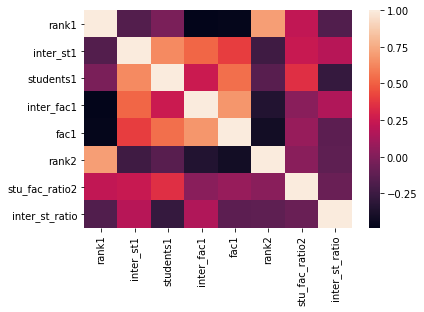

In [99]:
sns.heatmap(df_mergedTest.corr())

In [87]:
df_mergedTest.inter_st1.corr(df_mergedTest.inter_fac1)

0.52420163141544884

In [88]:
df_mergedTest.inter_st_ratio.corr(df_mergedTest.rank1)

-0.1688888539563862

In [89]:
df_mergedTest.inter_st_ratio.corr(df_mergedTest.rank2)

-0.12187223541457291

### Task 5

<div class="lev1"><a href="#Table-of-Contents"><span class="toc-item-num"></span>Table of contents</a></div>

In [90]:
df_mergedRank = df_mergedTest.copy(deep=True)

In [91]:
df_mergedRank.dtypes

country1           object
rank1               int64
region1            object
name               object
inter_st1         float64
students1         float64
inter_fac1        float64
fac1              float64
rank2               int64
stu_fac_ratio2    float64
inter_st_ratio    float64
dtype: object

We reuse the data created for question 4, where we changed some of the column types to numerical

Initial Ranking, sorting on both rank1 and rank2, sorting first over rank 1 and then over rank2  

In [92]:
df_mergedRank.sort_values(ascending=[True,True], 
                                           by=['rank1', 'rank2']).head(5)

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
0,United States,2,North America,Stanford University,3717.0,11067.0,1679.0,2982.0,4,7.5,0.22
1,United States,3,North America,Harvard University,5266.0,22429.0,1311.0,4350.0,6,8.9,0.24
2,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0,2,10.9,0.27
3,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,1,11.2,0.38
4,United Kingdom,8,Europe,Imperial College London,8746.0,16090.0,2071.0,3930.0,8,11.4,0.55


Therefore if we change rank 1 and rank 2, the ranking changes... A situation which is not fair, ranking 1 and 2 are worth the same, let's see how we can rank better 

In [93]:
df_mergedRank.sort_values(ascending=[True,True], 
                                           by=['rank2', 'rank1']).head(5)

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio
3,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,1,11.2,0.38
2,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0,2,10.9,0.27
0,United States,2,North America,Stanford University,3717.0,11067.0,1679.0,2982.0,4,7.5,0.22
1,United States,3,North America,Harvard University,5266.0,22429.0,1311.0,4350.0,6,8.9,0.24
6,United States,13,North America,Princeton University,1793.0,8069.0,246.0,1007.0,7,8.3,0.26


Let's first consider a linear type of ranking, giving equal weight to each place in the rank and weighting rank1 and rank2 equivalently

In [94]:
df_mergedRank = df_mergedRank.assign(averageRank=\
                ((df_mergedRank['rank1']+df_mergedRank['rank2']))/200)

In [95]:
df_mergedRank.sort_values(ascending=True,by='averageRank').head(10)

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio,averageRank
0,United States,2,North America,Stanford University,3717.0,11067.0,1679.0,2982.0,4,7.5,0.22,0.030
2,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0,2,10.9,0.27,0.035
3,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,1,11.2,0.38,0.035
1,United States,3,North America,Harvard University,5266.0,22429.0,1311.0,4350.0,6,8.9,0.24,0.045
4,United Kingdom,8,Europe,Imperial College London,8746.0,16090.0,2071.0,3930.0,8,11.4,0.55,0.080
5,United States,9,North America,University of Chicago,3379.0,13557.0,635.0,2449.0,9,6.2,0.25,0.090
6,United States,13,North America,Princeton University,1793.0,8069.0,246.0,1007.0,7,8.3,0.26,0.100
8,United States,16,North America,Yale University,2469.0,12402.0,1708.0,4940.0,12,4.3,0.21,0.140
9,United States,17,North America,Johns Hopkins University,4105.0,16146.0,1061.0,4462.0,13,4.3,0.24,0.150
11,United States,19,North America,University of Pennsylvania,4250.0,20639.0,1383.0,5499.0,11,6.5,0.20,0.150


We see that we get different results again, those should be "more fair" as they cosider rank1 and rank2 equivalently

Let's then consider an unlinear system of ranking, where higher results will get more weights compared to lower ranked results.

In [96]:
df_mergedRank = df_mergedRank.assign(totalRankLog=\
    (np.log(df_mergedRank['rank1'])+np.log(df_mergedRank['rank2']))/200)

In [97]:
df_mergedRank.sort_values(ascending=True,by='totalRankLog').head(10)

,country1,rank1,region1,name,inter_st1,students1,inter_fac1,fac1,rank2,stu_fac_ratio2,inter_st_ratio,averageRank,totalRankLog
3,United Kingdom,6,Europe,University of Oxford,7353.0,19720.0,2964.0,6750.0,1,11.2,0.38,0.035,0.008959
0,United States,2,North America,Stanford University,3717.0,11067.0,1679.0,2982.0,4,7.5,0.22,0.030,0.010397
2,United Kingdom,5,Europe,University of Cambridge,6699.0,18770.0,2278.0,5490.0,2,10.9,0.27,0.035,0.011513
1,United States,3,North America,Harvard University,5266.0,22429.0,1311.0,4350.0,6,8.9,0.24,0.045,0.014452
4,United Kingdom,8,Europe,Imperial College London,8746.0,16090.0,2071.0,3930.0,8,11.4,0.55,0.080,0.020794
5,United States,9,North America,University of Chicago,3379.0,13557.0,635.0,2449.0,9,6.2,0.25,0.090,0.021972
6,United States,13,North America,Princeton University,1793.0,8069.0,246.0,1007.0,7,8.3,0.26,0.100,0.022554
8,United States,16,North America,Yale University,2469.0,12402.0,1708.0,4940.0,12,4.3,0.21,0.140,0.026287
11,United States,19,North America,University of Pennsylvania,4250.0,20639.0,1383.0,5499.0,11,6.5,0.20,0.150,0.026712
9,United States,17,North America,Johns Hopkins University,4105.0,16146.0,1061.0,4462.0,13,4.3,0.24,0.150,0.026991


We get new results with this method as well. 

Choice of "right" ranking is hard but what is certain is that the first way of ranking, which took one rank and then the other one, was incorrect. 
The two methods listed above are valid ways of ranking as both take equal part of each rank